In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

url = 'https://www.immd.gov.hk/opendata/hks/transport/immigration_clearance/statistics_on_daily_passenger_traffic.csv'
r = requests.get(url)
open('data.csv', 'wb').write(r.content)

df = pd.read_csv('data.csv')
df['日期'] = pd.to_datetime(df['日期'], format='%d-%m-%Y')
# 截取2024年第一季度
df = df[df['日期'] < '2024-04-01']
df = df[df['日期'] >= '2024-01-01']

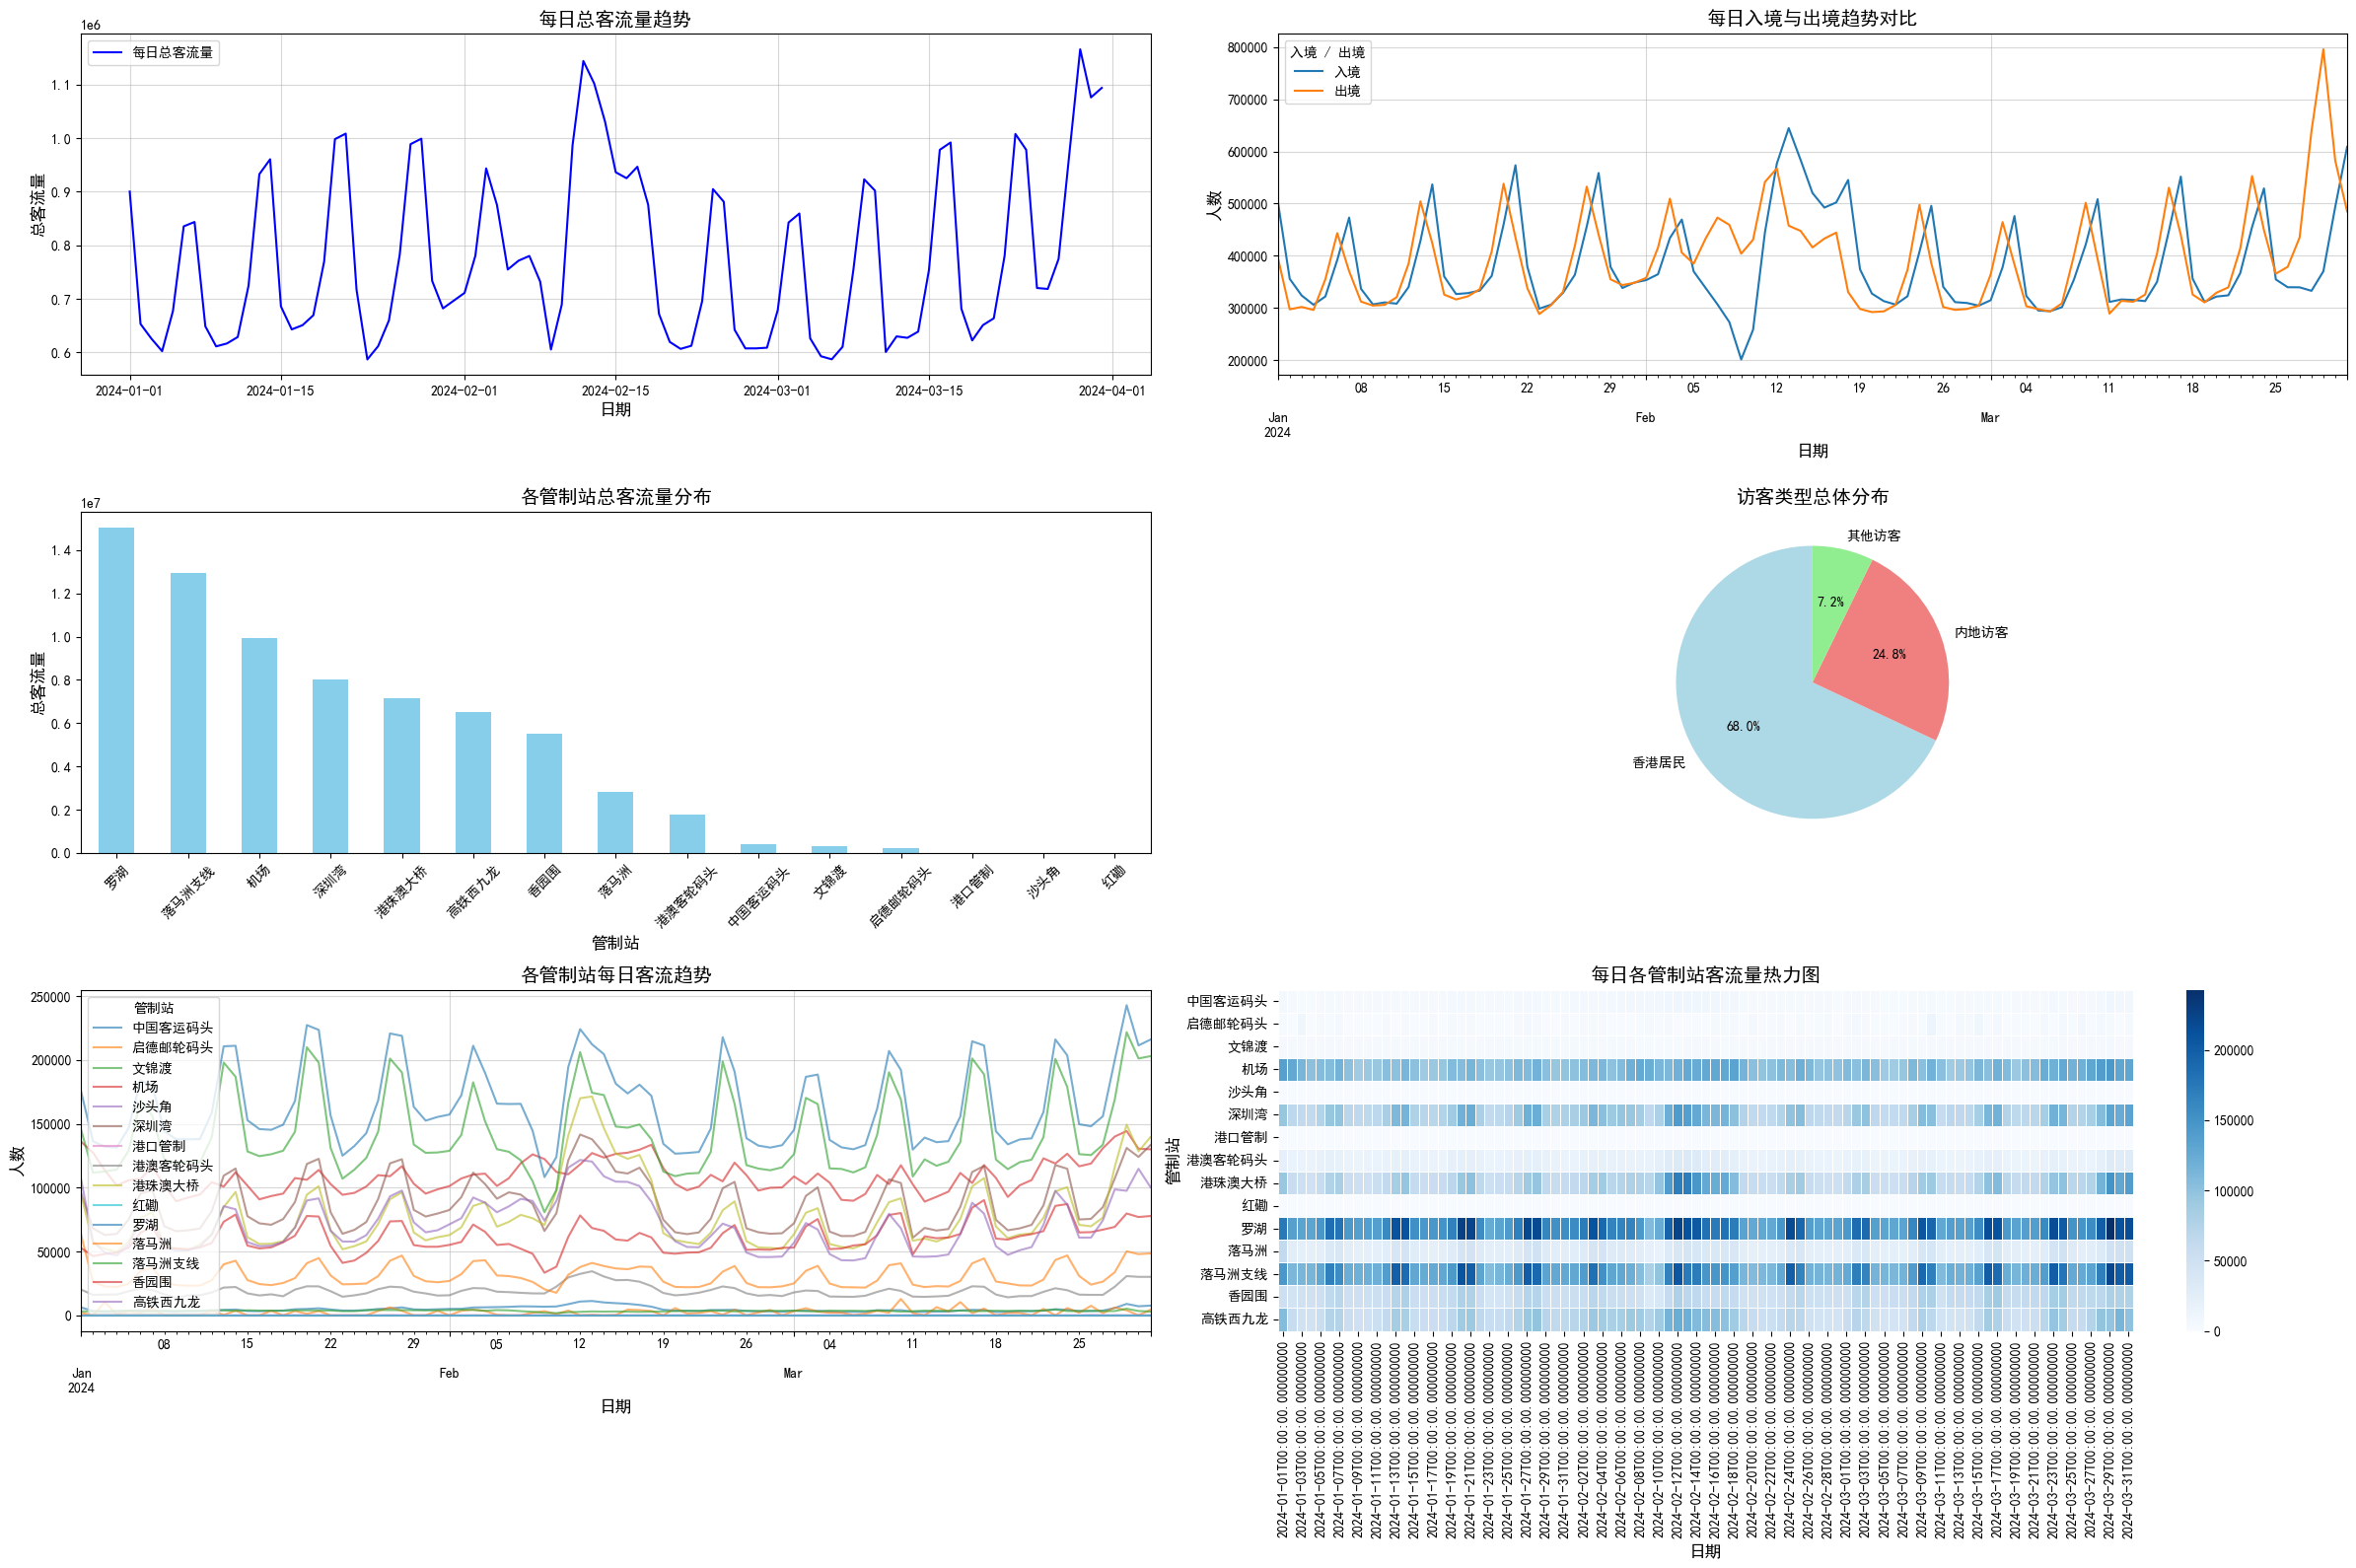

In [16]:
import seaborn as sns
# 创建子图布局
fig, axes = plt.subplots(3, 2, figsize=(24, 16))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# --- 图1: 每日总客流量趋势 ---
daily_totals = df.groupby('日期')['总计'].sum()
axes[0, 0].plot(daily_totals.index, daily_totals.values, label='每日总客流量', color='blue')
axes[0, 0].set_title('每日总客流量趋势', fontsize=14)
axes[0, 0].set_xlabel('日期', fontsize=12)
axes[0, 0].set_ylabel('总客流量', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.5)

# --- 图2: 每日入境与出境趋势 ---
daily_entry_exit = df.groupby(['日期', '入境 / 出境'])['总计'].sum().unstack()
daily_entry_exit.plot(ax=axes[0, 1], legend=True)
axes[0, 1].set_title('每日入境与出境趋势对比', fontsize=14)
axes[0, 1].set_xlabel('日期', fontsize=12)
axes[0, 1].set_ylabel('人数', fontsize=12)
axes[0, 1].grid(alpha=0.5)

# --- 图3: 各管制站总客流量分布 ---
station_totals = df.groupby('管制站')['总计'].sum().sort_values(ascending=False)
station_totals.plot(kind='bar', ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('各管制站总客流量分布', fontsize=14)
axes[1, 0].set_xlabel('管制站', fontsize=12)
axes[1, 0].set_ylabel('总客流量', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# --- 图4: 访客类型总体分布 ---
visitor_totals = df[['香港居民', '内地访客', '其他访客']].sum()
visitor_totals.plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%', startangle=90,
                    colors=['lightblue', 'lightcoral', 'lightgreen'])
axes[1, 1].set_title('访客类型总体分布', fontsize=14)
axes[1, 1].set_ylabel('')

# --- 图5: 各管制站每日趋势 ---
station_daily_totals = df.groupby(['日期', '管制站'])['总计'].sum().unstack()
station_daily_totals.plot(ax=axes[2, 0], alpha=0.6)
axes[2, 0].set_title('各管制站每日客流趋势', fontsize=14)
axes[2, 0].set_xlabel('日期', fontsize=12)
axes[2, 0].set_ylabel('人数', fontsize=12)
axes[2, 0].grid(alpha=0.5)

# --- 图6: 每日各管制站客流量热力图 ---
pivot_table = df.pivot_table(index='管制站', columns='日期', values='总计', aggfunc='sum', fill_value=0)
sns.heatmap(pivot_table, cmap='Blues', linewidths=0.5, ax=axes[2, 1])
axes[2, 1].set_title('每日各管制站客流量热力图', fontsize=14)
axes[2, 1].set_xlabel('日期', fontsize=12)
axes[2, 1].set_ylabel('管制站', fontsize=12)

# 显示图表
plt.tight_layout()
plt.show()